# MOUTH DETECTION

In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D 
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model+
, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.12.0


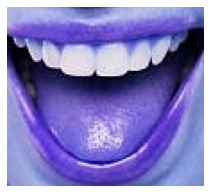

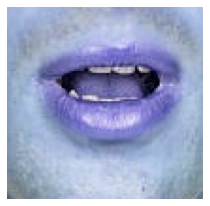

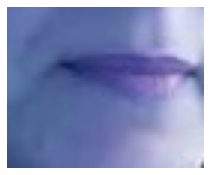

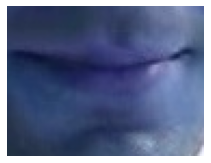

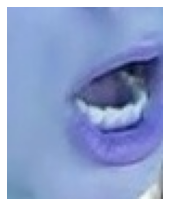

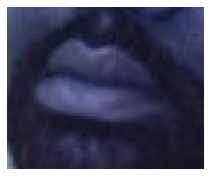

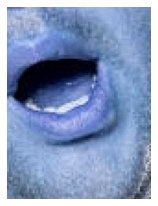

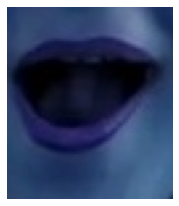

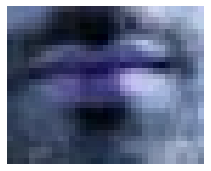

In [2]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

**Preparing Data for Training**

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size=(img_size, img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                    shuffle=True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                              target_size=(img_size, img_size),
                                                              color_mode="grayscale",
                                                              batch_size=batch_size,
                                                              class_mode="categorical",
                                                              shuffle=True)

Found 5119 images belonging to 2 classes.
Found 5119 images belonging to 2 classes.


In [4]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x   

In [5]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [6]:
 def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(inputs,64,(5,5))
    conv_3 = Convolution(inputs,128,(3,3))
    
    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)
    
    output = Dense(2,activation = "softmax")(dense_1)
    model = Model(inputs = [inputs], outputs = [output])
    
    model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [7]:
model = model_fer((48,48,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_2 (Batc  (None, 48, 48, 128)      512       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 128)       0     

**Initializing Model**

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = model_fer((48,48,1))
epochs = 15
steps_per_epoch = train_generator.n //train_generator.batch_size
validation_steps = validation_generator.n //validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=-1)

callbacks = [checkpoint]

# TRAINING THE MODEL

In [9]:
from tensorflow.keras.models import Model

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

Epoch 1/15
79/79 [==============================] - 62s 757ms/step - loss: 0.3840 - accuracy: 0.8552 - val_loss: 1.2469 - val_accuracy: 0.6195
Epoch 2/15
79/79 [==============================] - 60s 764ms/step - loss: 0.1996 - accuracy: 0.9228 - val_loss: 0.1806 - val_accuracy: 0.9280
Epoch 3/15
79/79 [==============================] - 56s 708ms/step - loss: 0.1349 - accuracy: 0.9517 - val_loss: 0.3184 - val_accuracy: 0.8606
Epoch 4/15
79/79 [==============================] - 65s 825ms/step - loss: 0.1059 - accuracy: 0.9618 - val_loss: 0.0890 - val_accuracy: 0.9727
Epoch 5/15
79/79 [==============================] - 60s 761ms/step - loss: 0.0783 - accuracy: 0.9727 - val_loss: 0.0908 - val_accuracy: 0.9676
Epoch 6/15
79/79 [==============================] - 59s 753ms/step - loss: 0.0623 - accuracy: 0.9794 - val_loss: 0.1288 - val_accuracy: 0.9417
Epoch 7/15
79/79 [==============================] - 59s 751ms/step - loss: 0.0510 - accuracy: 0.9832 - val_loss: 0.1943 - val_accuracy: 0.9213

**model Evaluation**

In [10]:
model.evaluate(validation_generator)

80/80 [==============================] - 14s 167ms/step - loss: 0.0104 - accuracy: 0.9975


[0.01042292919009924, 0.9974604249000549]

**Plotting Loss**

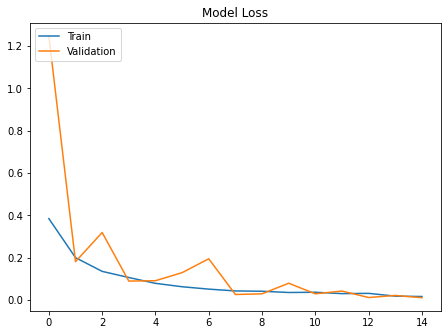

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)
plt.show()

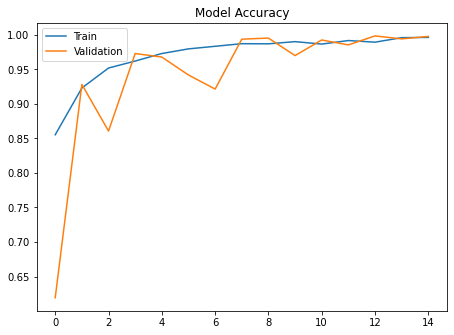

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)
plt.show()

**Saving Model Architechture**

In [13]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)